# Real-Time Data Analysis Dashboard


### A real-time data analysis dashboard is a graphical interface that provides users with up-to-date information and insights derived from analyzing streaming or constantly updating data. These dashboards typically display key metrics, trends, and visualizations that help users monitor, understand, and act on the data in real-time.


#### Why Exploratory data analysis for this?

##### Performing Exploratory Data Analysis (EDA) on your dataset, even if it's in CSV format for a real-time dashboard, can provide valuable insights and help you better understand the characteristics of your data. While real-time dashboards typically focus on monitoring ongoing trends and patterns, conducting EDA can still be beneficial for several reasons:

##### 1.Data Quality Assessment: EDA allows you to check the quality and integrity of your data. You can identify missing values, outliers, inconsistencies, or errors that may affect the reliability of your real-time dashboard.

##### 2.Understanding Data Distribution: By visualizing the distribution of your data through histograms, box plots, or density plots, you can gain insights into the range, central tendency, and variability of your variables. This understanding can inform your choice of visualization techniques and help you interpret the real-time trends more effectively.

##### 3.Identifying Patterns and Relationships: Exploring relationships between different variables using scatter plots, correlation matrices, or heatmaps can reveal patterns and dependencies in your data. Understanding these relationships can guide the selection of relevant metrics and KPIs to monitor in your real-time dashboard.

##### Feature Engineering: EDA can inspire feature engineering ideas by highlighting potential transformations, interactions, or combinations of variables that may improve the predictive power or interpretability of your dashboard metrics.



##### 5.User Requirements Analysis: EDA can also inform your understanding of user requirements and preferences. By visualizing different aspects of the data, you can identify key insights and trends that are relevant to your users' needs and interests.

###### Step 1: Importing Libraries

In [4]:
import pandas as pd
import matplotlib
import numpy
#Datasets is a lightweight library providing two main features: one-line dataloaders for many public datasets: one-liners to download and pre-process any of the. major public datasets (image datasets, audio datasets, text datasets in 467 languages and dialects, etc.)
from sklearn import datasets
from matplotlib import pyplot

In [5]:
from pandas.plotting import scatter_matrix
import warnings
import seaborn as sns
import os

##### Step 2: Reading Dataset

In [6]:
data = pd.read_csv("Store Data.csv")

In [7]:
data.head()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,12/4/2022,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,12/4/2022,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,12/4/2022,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,12/4/2022,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False


In [8]:
data.tail()

,index,Order ID,Cust ID,Gender,Age,Age Group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
31042,31043,405-4724097-1016369,4724097,Men,60,Senior,1/6/2022,Jan,Delivered,Flipkart,...,kurta,XL,1,INR,565,PUNE,MAHARASHTRA,412307,IN,False
31043,31044,405-4724097-1016369,4724097,Men,34,Adult,1/6/2022,Jan,Delivered,Myntra,...,Set,S,1,INR,939,BENGALURU,KARNATAKA,560061,IN,False
31044,31045,408-3572295-5992330,3572295,Men,29,Teenager,1/6/2022,Jan,Delivered,Amazon,...,Set,L,1,INR,1115,PITHORAGARH,UTTARAKHAND,262501,IN,False
31045,31046,405-1423498-9705162,1423498,Men,46,Adult,1/6/2022,Jan,Delivered,Amazon,...,kurta,M,1,INR,399,DHULE,MAHARASHTRA,424006,IN,False
31046,31047,408-4694875-8249153,4694875,Men,36,Adult,1/6/2022,Jan,Delivered,Flipkart,...,Western Dress,3XL,1,INR,791,WARANGAL,TELANGANA,506001,IN,False


In [9]:
data.columns

Index(['index', 'Order ID', 'Cust ID', 'Gender', 'Age', 'Age Group', 'Date',
       'Month', 'Status', 'Channel ', 'SKU', 'Category', 'Size', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B'],
      dtype='object')

In [10]:
data.isnull().sum()

index               0
Order ID            0
Cust ID             0
Gender              0
Age                 0
Age Group           0
Date                0
Month               0
Status              0
Channel             0
SKU                 0
Category            0
Size                0
Qty                 0
currency            0
Amount              0
ship-city           0
ship-state          0
ship-postal-code    0
ship-country        0
B2B                 0
dtype: int64

##### 1. Based on Unserstanding of the data, what kind of business is this comapny in?

###### Answer: In-store data presents information about retail businesses' in-store activities and metrics such as footfall traffic (people counting), customer behavior, sales data, customer buying patterns, and product stocks.

In [11]:
# Univariate Analysis for Numeric Variables
numeric_variables = ['Age', 'Amount', 'Qty']

In [12]:
# Summary statistics
summary_stats_numeric = data[numeric_variables].describe()
print(summary_stats_numeric)

                Age        Amount           Qty
count  31047.000000  31047.000000  31047.000000
mean      39.496570    682.074822      1.006120
std       15.117233    268.582173      0.094088
min       18.000000    229.000000      1.000000
25%       28.000000    486.000000      1.000000
50%       37.000000    646.000000      1.000000
75%       47.000000    794.000000      1.000000
max       78.000000   3036.000000      5.000000


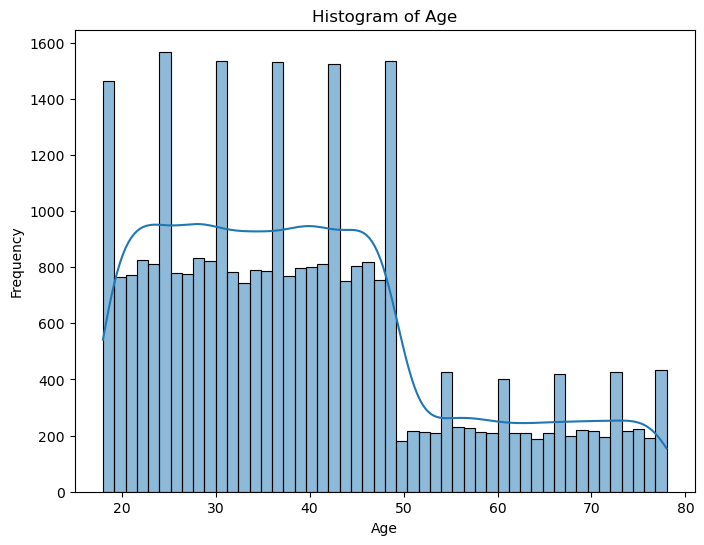

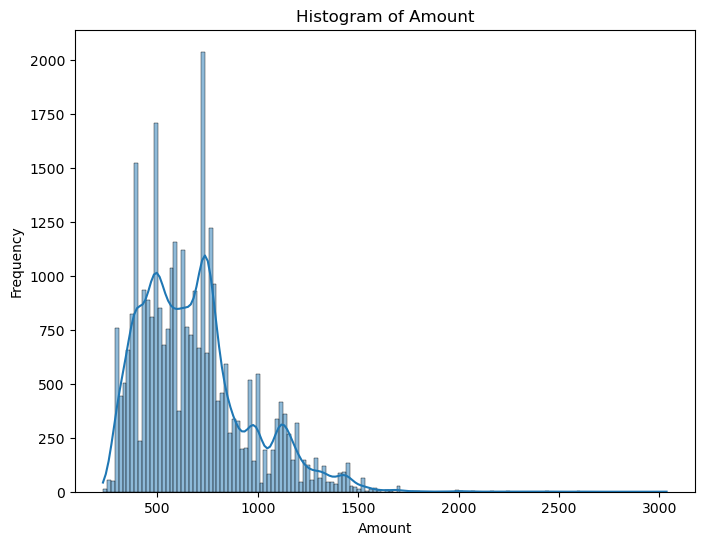

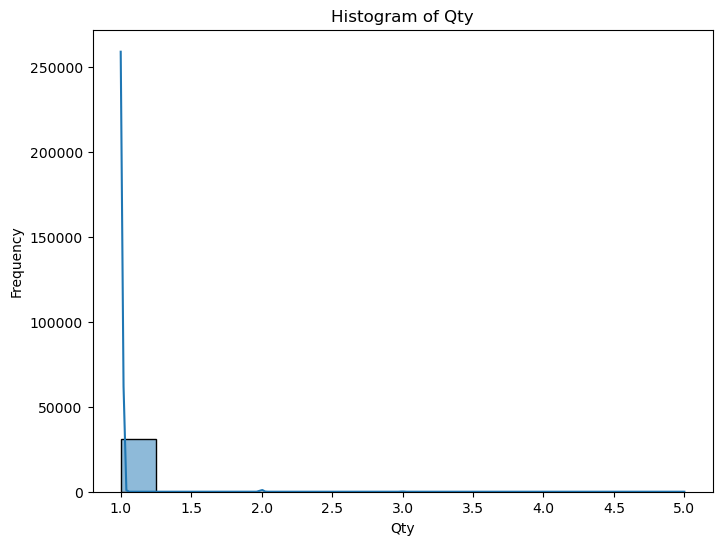

In [13]:
# Visualizations for numeric variables
import matplotlib.pyplot as plt
for var in numeric_variables:
    # Histogram
    plt.figure(figsize=(8, 6))
    sns.histplot(data[var], kde=True)
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {var}')
    plt.show()

##### Insights:-

###### Usually people spend 500 - 1000 for shopping and most of the people purchase only single items.

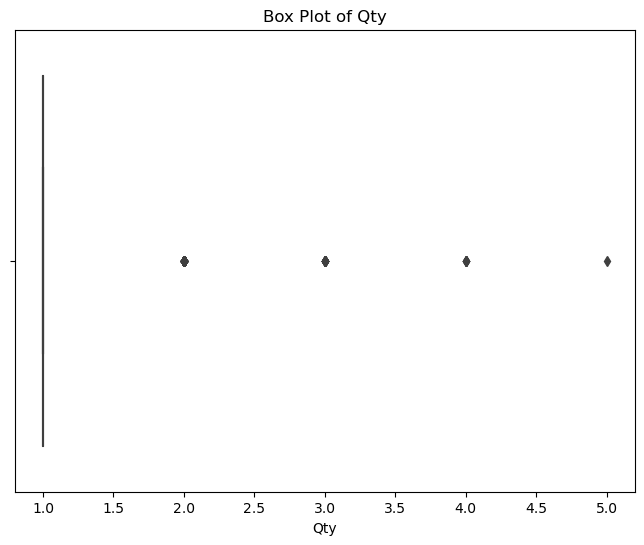

In [14]:
# Box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x=var)
plt.xlabel(var)
plt.title(f'Box Plot of {var}')
plt.show()

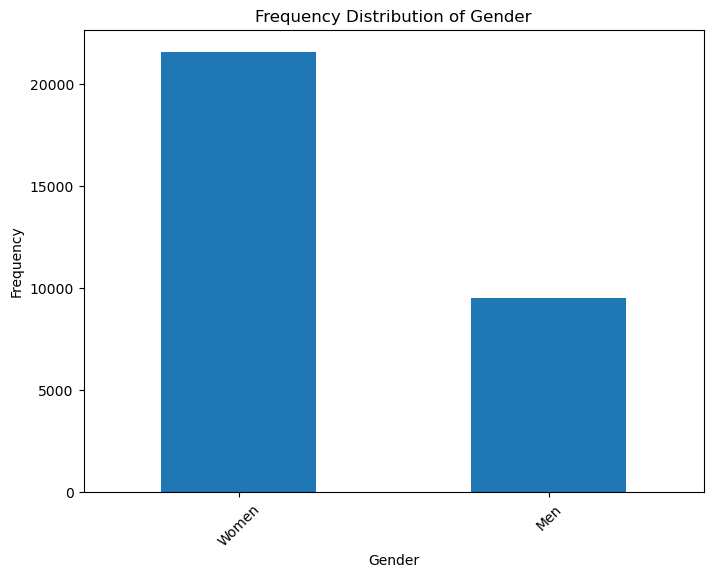

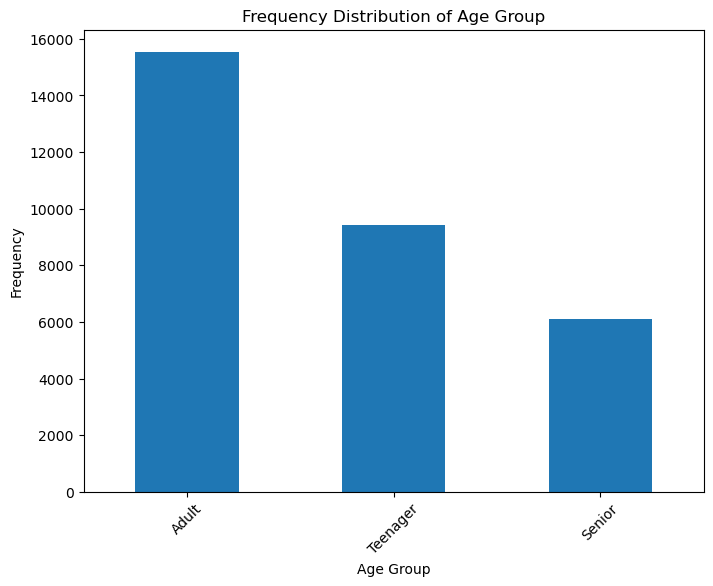

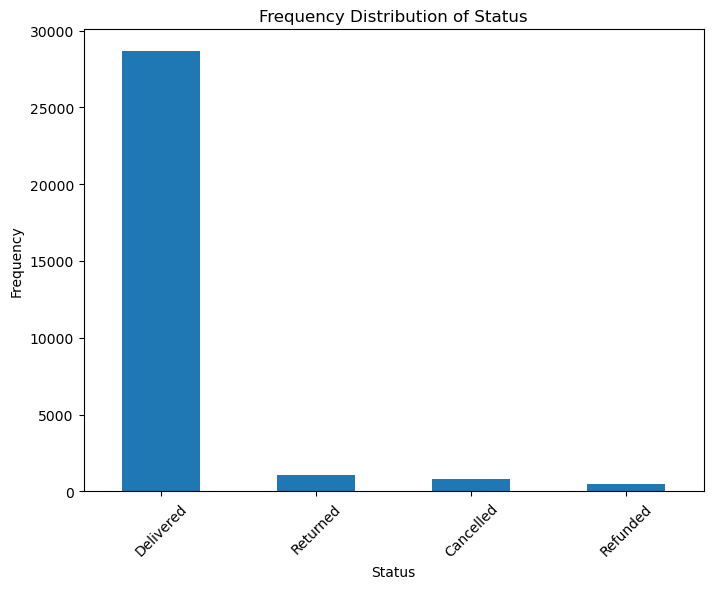

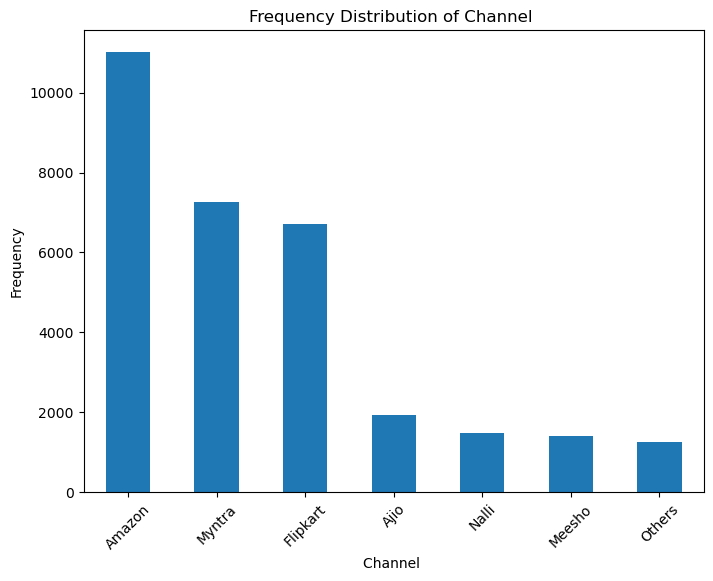

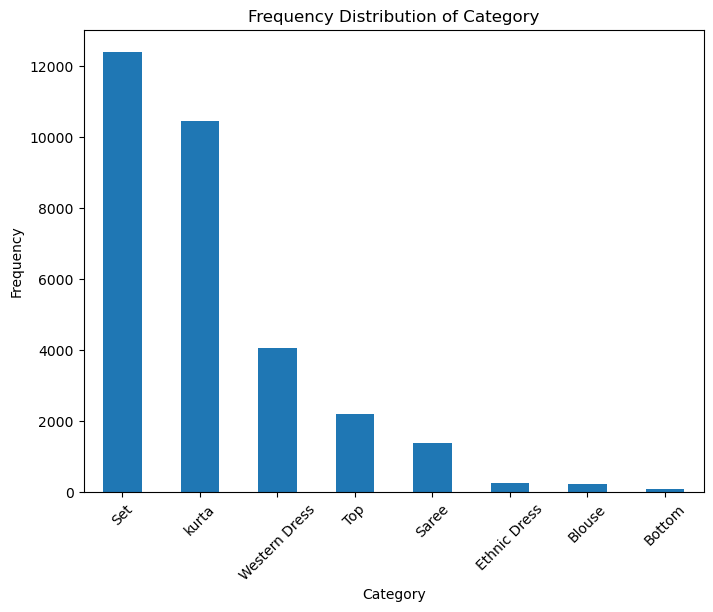

In [15]:
# Univariate Analysis for Categorical Variables
categorical_variables = ['Gender', 'Age Group', 'Status', 'Channel ', 'Category']

# Visualizations for categorical variables
for var in categorical_variables:
    # Frequency distribution (bar chart)
    plt.figure(figsize=(8, 6))
    data[var].value_counts().plot(kind='bar')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.title(f'Frequency Distribution of {var}')
    plt.xticks(rotation=45)
    plt.show()

##### Insights:

##### Mostly women do shopping, seems men are half in quantity of women

##### From Adult, Teenager and senior, mostly Adult prefer shopping so Markets tarket should be Adult.

##### Top e- commerce business are Amazon then Myntra and then Flipkart

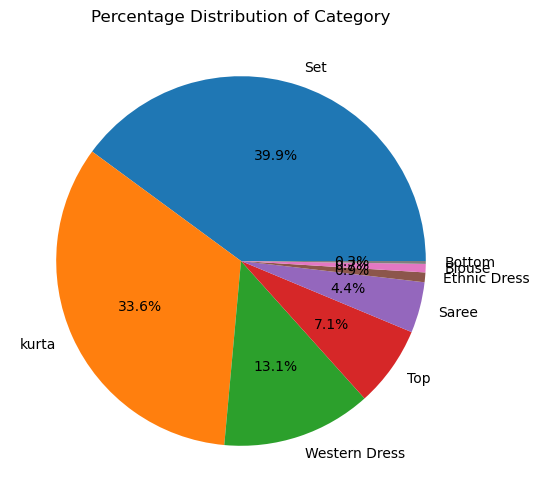

In [16]:
# Frequency distribution (pie chart)
plt.figure(figsize=(8, 6))
data[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
plt.title(f'Percentage Distribution of {var}')
plt.show()

###### Insights

###### Mostly preferabble dresses are set whose percent are 39.9% after that kurta with 33.6%.

In [17]:
# List of numeric variables
numeric_variables = ['Age', 'Amount', 'Qty']

# Bivariate Analysis for Numeric Variables
# Scatter plots and Correlation Coefficients
for i in range(len(numeric_variables)):
    for j in range(i+1, len(numeric_variables)):
        var1 = numeric_variables[i]
        var2 = numeric_variables[j]


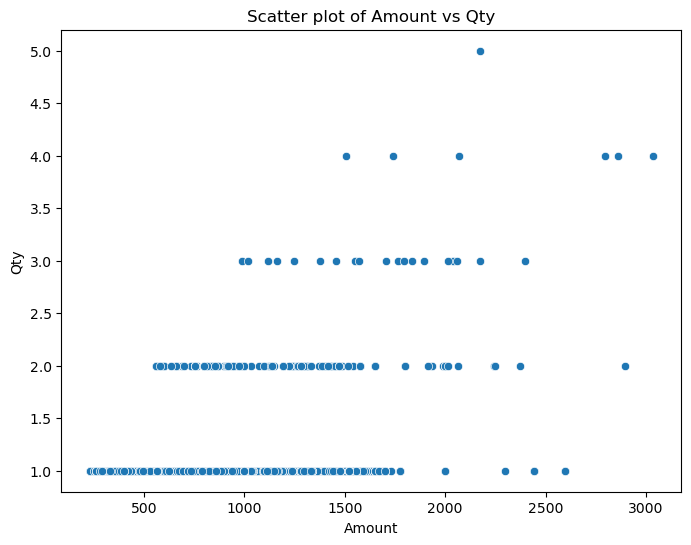

In [18]:
# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x=var1, y=var2)
plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Scatter plot of {var1} vs {var2}')
plt.show()

In [19]:
# Correlation coefficient
correlation_coefficient = data[var1].corr(data[var2])
print(f"Correlation coefficient between {var1} and {var2}: {correlation_coefficient}\n")


Correlation coefficient between Amount and Qty: 0.17237736591040173



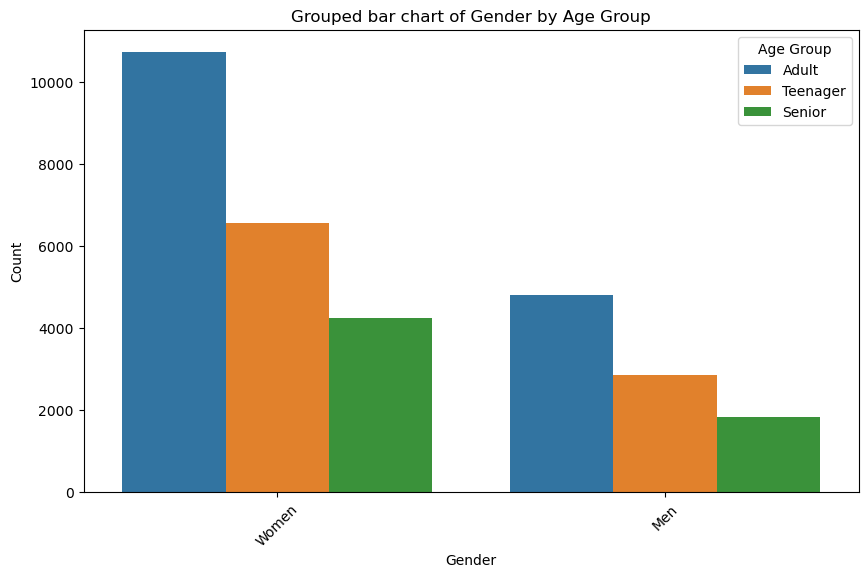

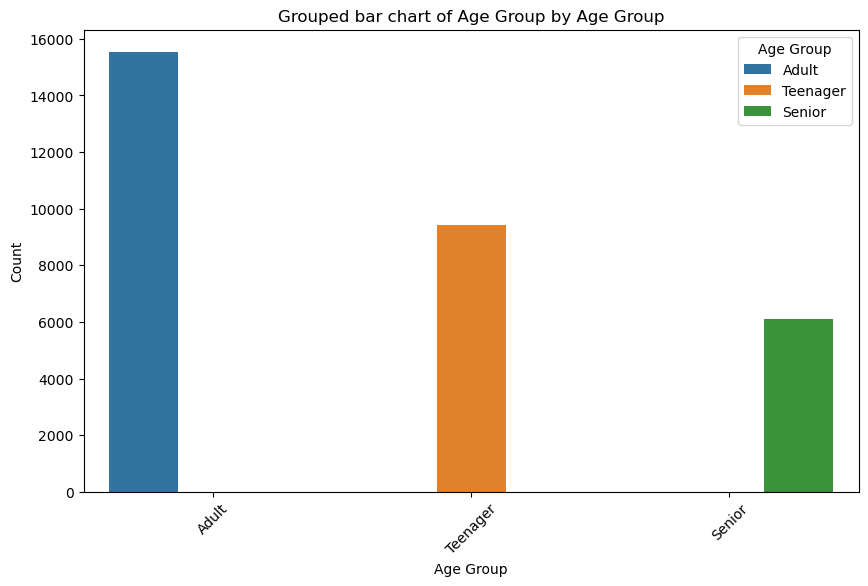

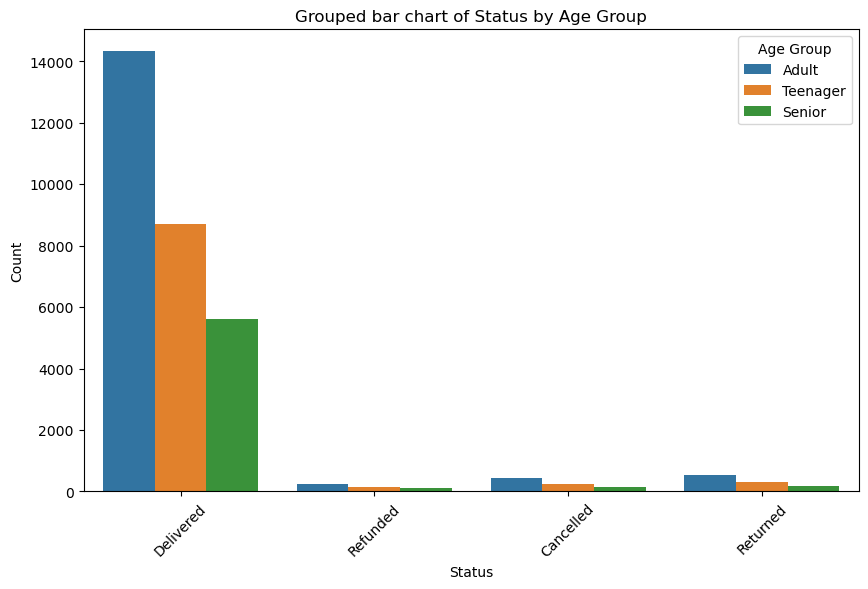

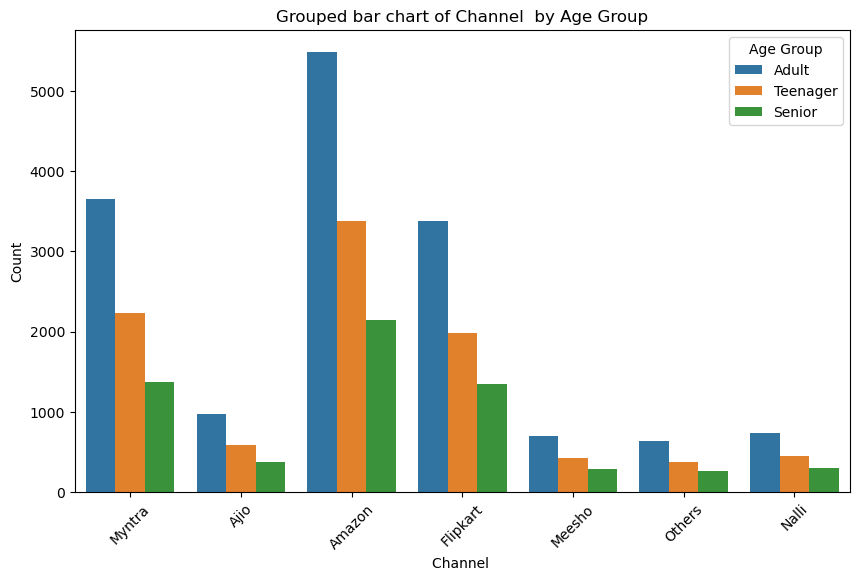

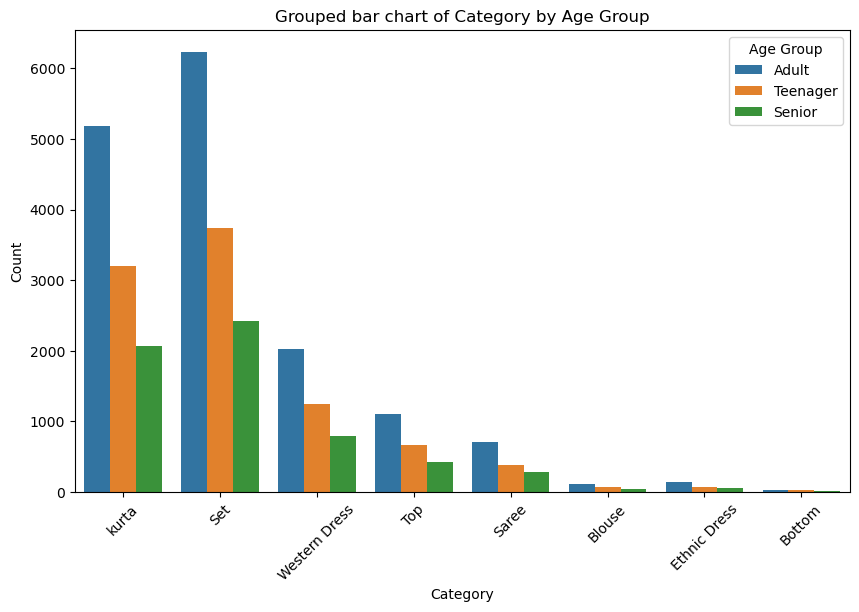

In [20]:
# Bivariate Analysis for Categorical Variables
for cat_var in categorical_variables:
    # Grouped bar chart
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=cat_var, hue='Age Group')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.title(f'Grouped bar chart of {cat_var} by Age Group')
    plt.xticks(rotation=45)
    plt.legend(title='Age Group')
    plt.show()

###### From above plot we can usually women perform shopping and most preferabble e-commerce site are Amazon and myntra.

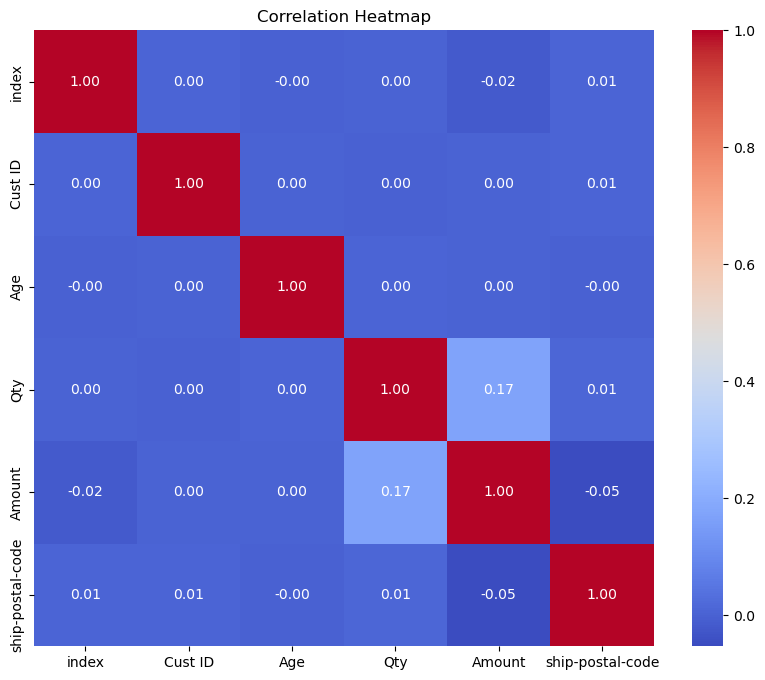

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
# If you have non-numeric columns, you might want to drop them or handle them appropriately

# Drop non-numeric columns if necessary
data_numeric = data.select_dtypes(include='number')

plt.figure(figsize=(10, 8))
sns.heatmap(data_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [22]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


c:\Users\dp559\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


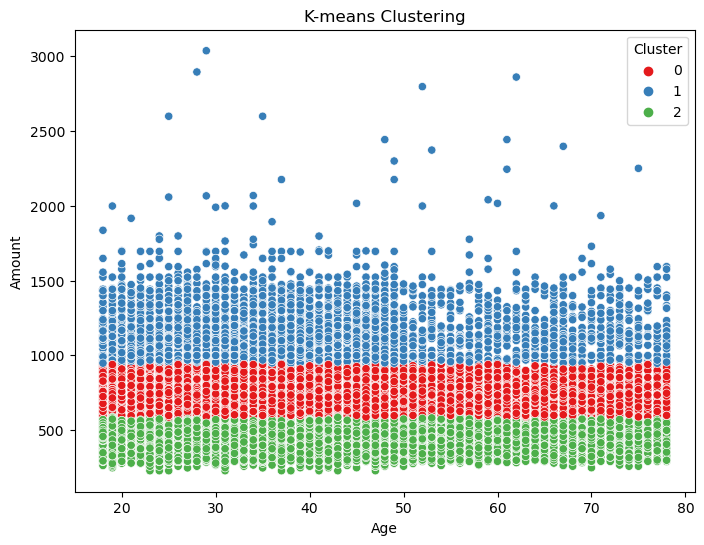

In [23]:
# Cluster analysis (K-means clustering)
X = data[['Age', 'Amount']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Age', y='Amount', hue='Cluster', palette='Set1', legend='full')
plt.title('K-means Clustering')
plt.xlabel('Age')
plt.ylabel('Amount')
plt.show()

###### Here in above code:-X = data[['Age', 'Amount']] This line selects the 'Age' and 'Amount' columns from the DataFrame data and assigns them to the variable X. These columns will be used as features for clustering.

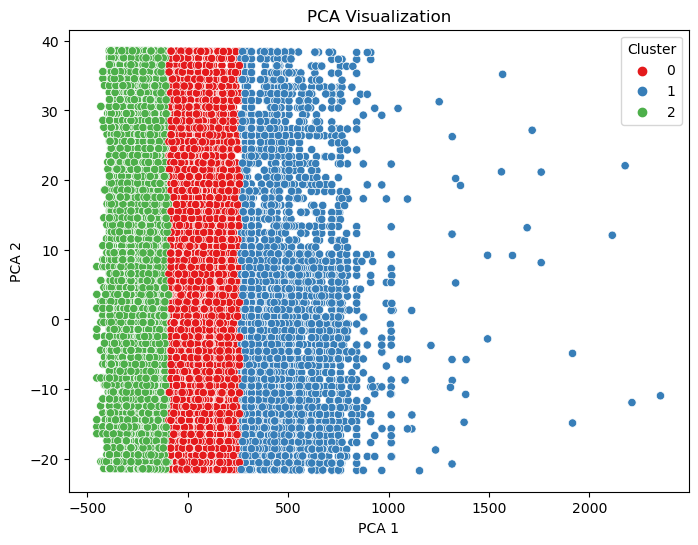

In [24]:
# Dimensionality reduction (PCA)
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data[['Age', 'Amount']])
data['PCA1'] = data_pca[:, 0]
data['PCA2'] = data_pca[:, 1]
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', legend='full')
plt.title('PCA Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

###### Principal Component Analysis (PCA) is a dimensionality reduction technique used to transform high-dimensional data into a lower-dimensional space while preserving most of the variance in the original data. In simpler terms, PCA identifies patterns in data and represents it in a more compact form.

###### Dimensionality Reduction: The original dataset may contain multiple features (columns), which can make it difficult to visualize and analyze effectively, especially when dealing with high-dimensional data. PCA reduces the number of features while retaining as much of the variability in the data as possible. In this case, PCA is applied to the 'Age' and 'Amount' features to transform them into two principal components (PCA1 and PCA2), which capture the most significant variability in the data.

###### Visualization: PCA allows for the visualization of high-dimensional data in a lower-dimensional space, making it easier to interpret and analyze. By reducing the dimensionality of the data to two dimensions, it becomes possible to create scatter plots or other visualizations that help to understand the relationships and patterns in the data. In the provided code, the transformed data is plotted in a two-dimensional scatter plot, where each point represents a data point, and its position is determined by the values of the principal components (PCA1 and PCA2). Additionally, the points are colored according to the cluster they belong to, providing insights into the clustering structure of the data.

###### Clustering Analysis: PCA can be used as a preprocessing step for clustering analysis. By reducing the dimensionality of the data, PCA can improve the performance and interpretability of clustering algorithms. In this case, the PCA-transformed data is visualized with cluster assignments, allowing for a better understanding of the clusters formed by the K-means clustering algorithm

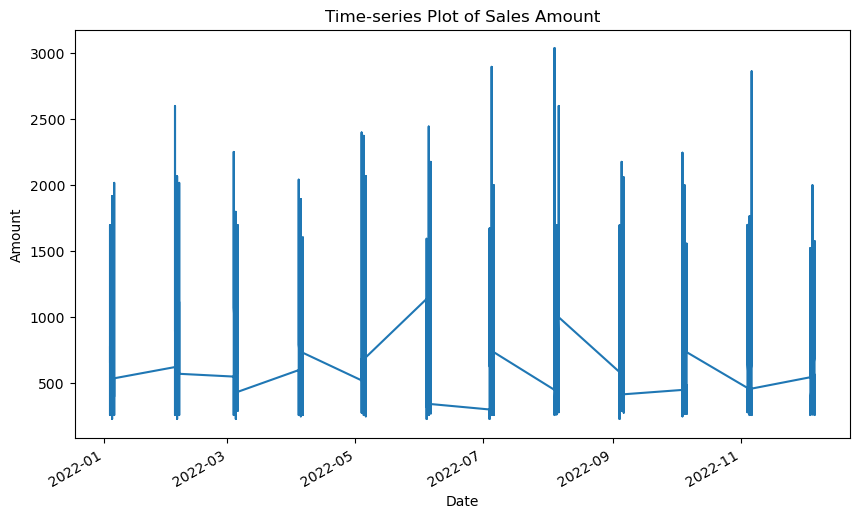

In [25]:
# Temporal Analysis
# Time-series plot
plt.figure(figsize=(10, 6))
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data['Amount'].plot()
plt.title('Time-series Plot of Sales Amount')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()

###### Temporal Analysis:



###### Analyze temporal patterns using time-series plots to visualize trends over time.
Decompose time-series data into trend, seasonality, and residual components using techniques like seasonal decomposition.
Use time-series forecasting models (e.g., ARIMA, exponential smoothing) to predict future values based on historical data.

In [26]:
# Seasonal decomposition
decomposition = seasonal_decompose(data['Amount'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Seasonal Decomposition: Seasonal decomposition is a technique used to decompose a time series into its constituent components: trend, seasonality, and residual. These components help us understand the underlying patterns and variations in the time series data.

seasonal_decompose(data['Amount'], model='additive', period=12): This line applies seasonal decomposition to the 'Amount' column of the DataFrame data. The model='additive' argument indicates that the decomposition model assumes that the time series is an additive combination of its components. The period=12 argument specifies the length of the seasonal cycle, assuming that the data has a seasonal pattern repeating every 12 time periods (e.g., months, quarters).

decomposition.trend: This line extracts the trend component from the seasonal decomposition. The trend represents the underlying long-term pattern or directionality of the time series, capturing gradual changes over time.

decomposition.seasonal: This line extracts the seasonal component from the seasonal decomposition. The seasonal component represents the periodic fluctuations or seasonal patterns in the data, such as monthly or quarterly variations.

decomposition.resid: This line extracts the residual component from the seasonal decomposition. The residual component represents the random or unexplained variation in the data after removing the trend and seasonal components.

By decomposing the time series into these components, seasonal decomposition helps in understanding the various factors contributing to the overall behavior of the data. It can be useful for identifying seasonal patterns, detecting anomalies, and forecasting future values based on historical data.

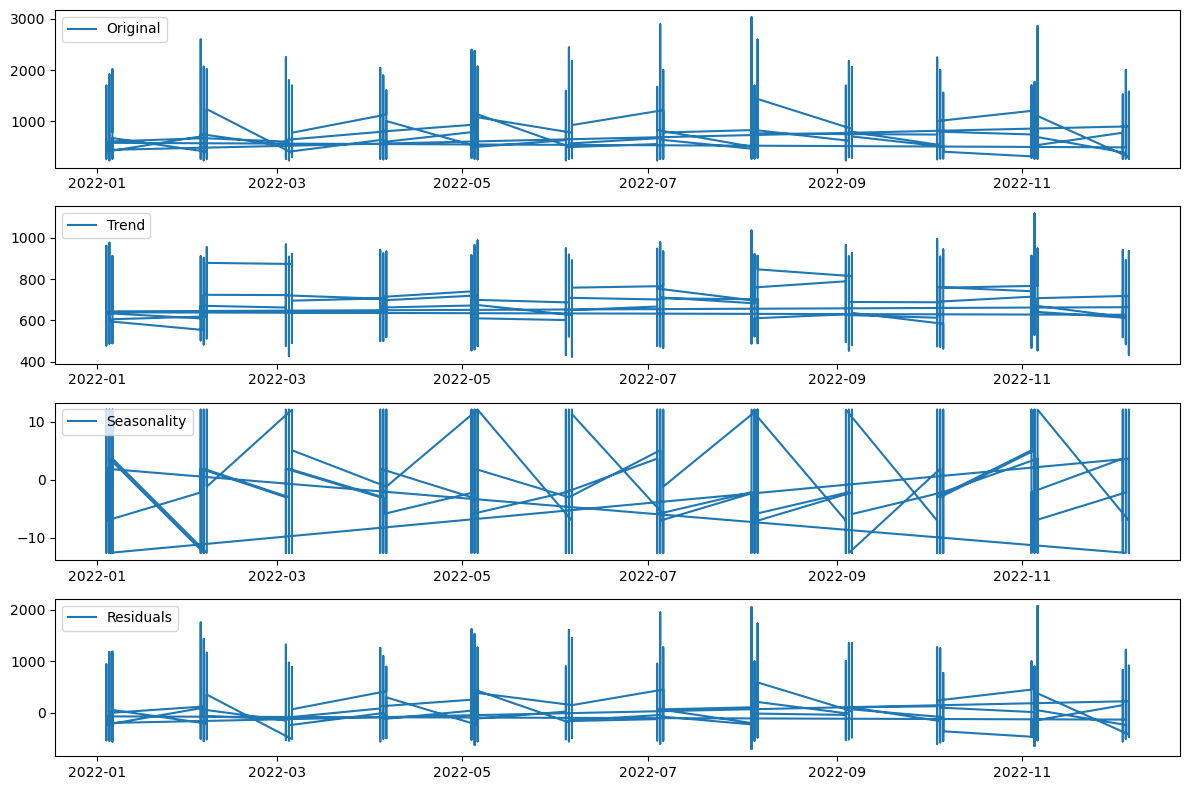

In [27]:
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Amount'], label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

###### The resulting visualization provides a clear view of the original time series data along with its decomposed components: trend, seasonality, and residuals. This breakdown helps in understanding the individual contributions of each component to the overall behavior of the time series. It can aid in identifying patterns, detecting anomalies, and making informed decisions in time series analysis and forecasting.

c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-

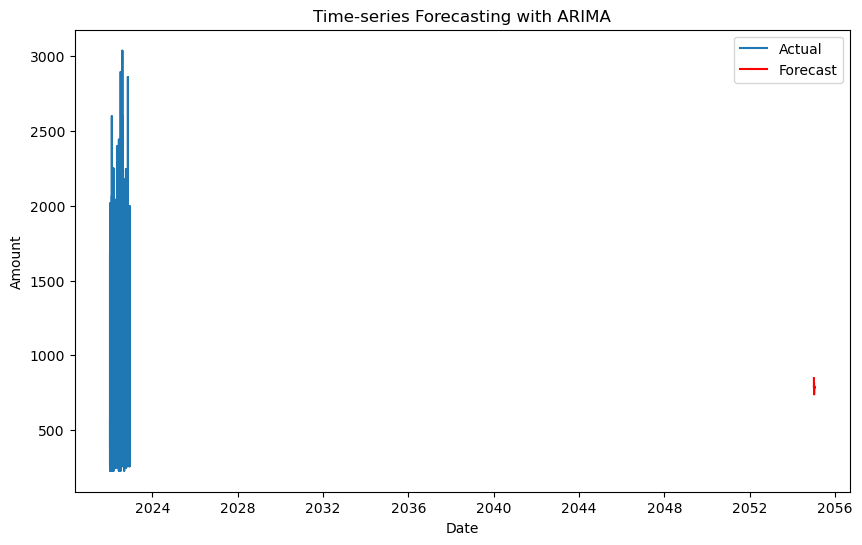

In [28]:

# Time-series forecasting (ARIMA)
model = ARIMA(data['Amount'], order=(5,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=12)

plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Amount'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Time-series Forecasting with ARIMA')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()

In [40]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 Amount   No. Observations:                31047
Model:                 ARIMA(5, 1, 0)   Log Likelihood             -219908.196
Date:                Wed, 20 Mar 2024   AIC                         439828.392
Time:                        18:08:31   BIC                         439878.452
Sample:                             0   HQIC                        439844.428
                              - 31047                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8051      0.005   -148.796      0.000      -0.816      -0.795
ar.L2         -0.6420      0.007    -95.803      0.000      -0.655      -0.629
ar.L3         -0.4857      0.007    -67.753      0.000      -0.500      -0.472
ar.L4         -0.3324      0.007    -48.969      0.000      -0.346      -0.319
ar.L5         -0.1600      0.006    -29.049      0.000      -0.171      -0.149
sigma2      8.316e+04    517.326    160.746      0.000    8.21e+04    8.42e+04
===================================================================================
Ljung-Box (L1) (Q):                  14.07   Jarque-Bera (JB):              5671.73
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.81
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

###### the overall statement executes the entire process of initializing, fitting, and using the ARIMA model to generate forecasts for a time series dataset. It then visualizes these forecasts alongside the actual data, providing insights into future trends and patterns.

The ARIMA (AutoRegressive Integrated Moving Average) model is a popular and widely used time series forecasting technique. It's particularly effective for modeling univariate time series data that exhibits a trend or seasonality. Here's a breakdown of how the ARIMA model works and how it's used:

AutoRegressive (AR) Component:

The ARIMA model includes an autoregressive component, denoted by the parameter p, which captures the relationship between an observation and a fixed number of lagged observations (previous time steps).
This component models the linear dependence between an observation at time 't' and its 'p' most recent observations.
Integrated (I) Component:

The ARIMA model includes an integrated component, denoted by the parameter d, which represents the degree of differencing applied to the time series data.
Differencing involves subtracting the current observation from the previous observation to make the data stationary (i.e., remove trend or seasonality).
The integrated component transforms the original time series into a stationary series, making it suitable for modeling.
Moving Average (MA) Component:

The ARIMA model also includes a moving average component, denoted by the parameter q, which captures the relationship between an observation and a residual error from a moving average model applied to lagged observations.
This component models the dependency between an observation and a residual error from a moving average model.
Model Identification:

The parameters p, d, and q of the ARIMA model need to be determined or selected based on the characteristics of the time series data.
This process often involves visual inspection of the time series plot, autocorrelation function (ACF) plot, and partial autocorrelation function (PACF) plot to identify potential values for p, d, and q.
Model Fitting:

Once the parameters are determined, the ARIMA model is fitted to the time series data using historical observations.
The model estimation involves finding the optimal coefficients for the autoregressive, differencing, and moving average components that minimize the error between the observed and predicted values.
Forecasting:

After fitting the ARIMA model, it can be used to generate forecasts for future time steps.
These forecasts provide estimates of future values based on the historical patterns and relationships captured by the model.
Model Evaluation:

The performance of the ARIMA model can be evaluated using various metrics such as mean squared error (MSE), root mean squared error (RMSE), mean absolute error (MAE), etc.
These metrics quantify the accuracy of the model's forecasts relative to the actual observed values.
Overall, the ARIMA model is a powerful tool for time series forecasting, particularly when dealing with data that exhibits trends or seasonality. It allows analysts and data scientists to make informed predictions about future values based on historical observations.

### Future-Proceeding


Select a dashboarding tool: There are many dashboarding tools available that can help you create real-time dashboards with ease. Some popular options include Tableau, Power BI, Google Data Studio, and Grafana. Choose a tool that best fits your requirements in terms of features, ease of use, and compatibility with your data sources.

Connect your data source: Once you have chosen a dashboarding tool, connect it to your data source(s). This typically involves setting up data connections or integrations provided by the dashboarding tool.

Design your dashboard: Design the layout of your dashboard and decide what visualizations you want to include. Common types of visualizations include charts, graphs, tables, maps, and gauges. Make sure the layout is intuitive and easy to understand for your target audience.

Implement real-time updates: Configure your dashboard to update automatically as new data comes in. Most dashboarding tools support real-time data updates through features like live data connections or scheduled data refreshes.

Add interactivity: Enhance the usability of your dashboard by adding interactive elements such as filters, drill-down capabilities, and dynamic parameters. This allows users to explore the data and gain deeper insights.

Test and iterate: Test your dashboard thoroughly to ensure that it works as expected and provides accurate insights. Gather feedback from users and iterate on the design based on their input.

Deploy your dashboard: Once you're satisfied with your dashboard, deploy it to your intended audience. This could be through a web server, intranet, or embedding it within other applications.

Monitor and maintain: Monitor the performance of your dashboard over time and make any necessary updates or optimizations. Regularly review the data sources, visualizations, and user feedback to ensure that the dashboard remains relevant and effective.

c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\dp559\anaconda3\Lib\site-

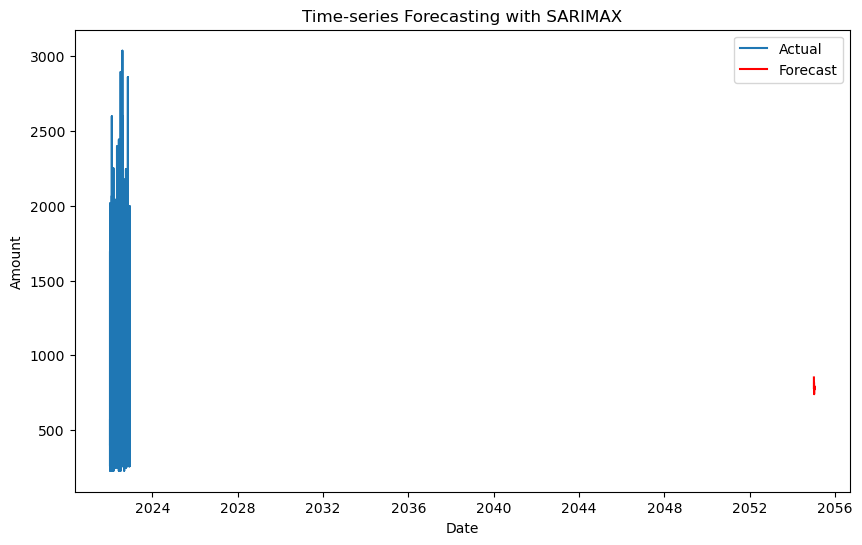

In [84]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMAX model parameters
order = (5, 1, 0)  # (p, d, q) parameters
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, S) seasonal parameters

# Instantiate and fit the SARIMAX model
model = SARIMAX(data['Amount'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Make future predictions
forecast = model_fit.forecast(steps=12)

# Plotting the actual data and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Amount'], label='Actual')
plt.plot(forecast.index, forecast, label='Forecast', color='red')
plt.title('Time-series Forecasting with SARIMAX')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


In [85]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                               Amount   No. Observations:                31047
Model:             SARIMAX(5, 1, 0)x(1, 1, [1], 12)   Log Likelihood             -219863.790
Date:                              Wed, 20 Mar 2024   AIC                         439743.579
Time:                                      18:45:07   BIC                         439810.322
Sample:                                           0   HQIC                        439764.960
                                            - 31047                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8049      0.005   -148.591      0.000      -0.815      -0.794
ar.L2         -0.6417      0.007    -95.681      0.000      -0.655      -0.629
ar.L3         -0.4857      0.007    -67.761      0.000      -0.500      -0.472
ar.L4         -0.3322      0.007    -48.931      0.000      -0.346      -0.319
ar.L5         -0.1599      0.006    -29.013      0.000      -0.171      -0.149
ar.S.L12      -0.0017      0.006     -0.309      0.757      -0.013       0.009
ma.S.L12      -1.0000      0.006   -160.530      0.000      -1.012      -0.988
sigma2      8.315e+04   7.49e-08   1.11e+12      0.000    8.31e+04    8.31e+04
===================================================================================
Ljung-Box (L1) (Q):                  14.01   Jarque-Bera (JB):              5600.60
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.94   Skew:                             0.80
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 7.18e+25. Standard errors may be unstable.
"""

Epoch 1/100
776/776 [==============================] - 13s 12ms/step - loss: 0.0095 - val_loss: 0.0087
Epoch 2/100
776/776 [==============================] - 10s 13ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 3/100
776/776 [==============================] - 10s 13ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 4/100
776/776 [==============================] - 8s 11ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 5/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 6/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 7/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 8/100
776/776 [==============================] - 8s 10ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 9/100
776/776 [==============================] - 9s 11ms/step - loss: 0.0093 - val_loss: 0.0087
Epoch 10/100
776/776 [==============================] - 8s 11ms/step - loss: 0.

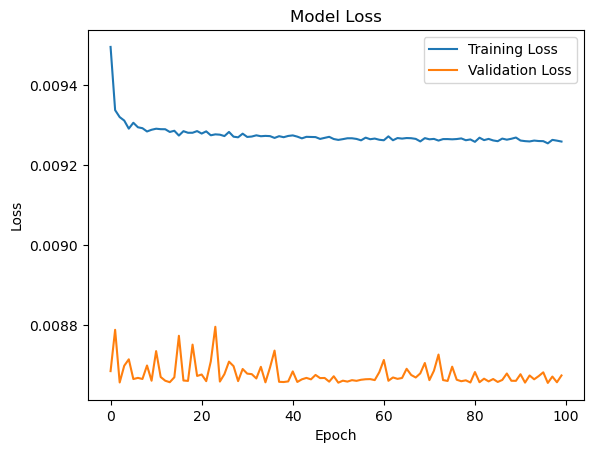

194/194 [==============================] - 1s 4ms/step


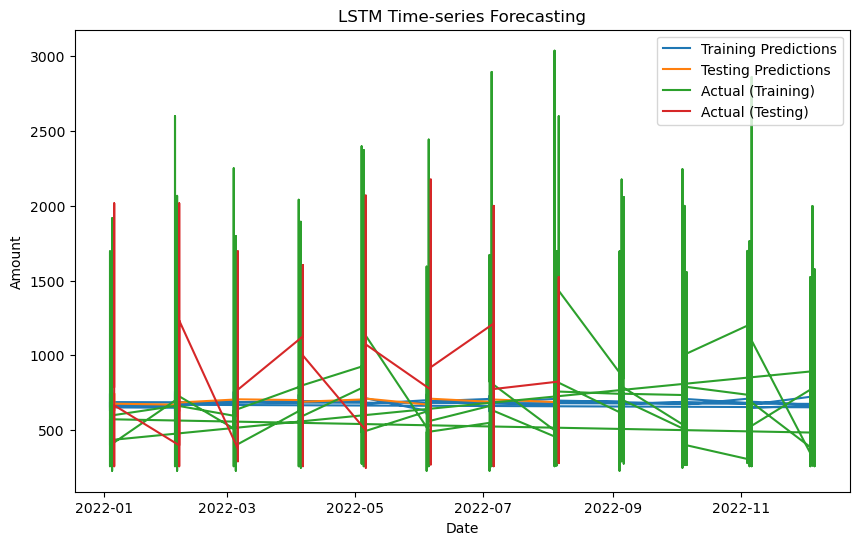

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming 'data' contains your time-series data with 'Date' as index and 'Amount' as target variable
# Preprocessing data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[['Amount']])

# Splitting data into training and testing sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train_data, test_data = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Function to create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:(i + seq_length), 0])
        y.append(data[i + seq_length, 0])
    return np.array(X), np.array(y)

seq_length = 10  # Number of time steps to look back
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape input data to be 3D for LSTM [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

# Inverse transform predictions to original scale
train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform([y_train])
test_predictions = scaler.inverse_transform(test_predictions)
y_test = scaler.inverse_transform([y_test])

# Plotting results
plt.figure(figsize=(10, 6))
plt.plot(data.index[seq_length:train_size], train_predictions, label='Training Predictions')
plt.plot(data.index[train_size+seq_length:], test_predictions, label='Testing Predictions')
plt.plot(data.index[:train_size], data['Amount'][:train_size], label='Actual (Training)')
plt.plot(data.index[train_size:], data['Amount'][train_size:], label='Actual (Testing)')
plt.title('LSTM Time-series Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.legend()
plt.show()


04:59:01 - cmdstanpy - INFO - Chain [1] start processing
04:59:04 - cmdstanpy - INFO - Chain [1] done processing


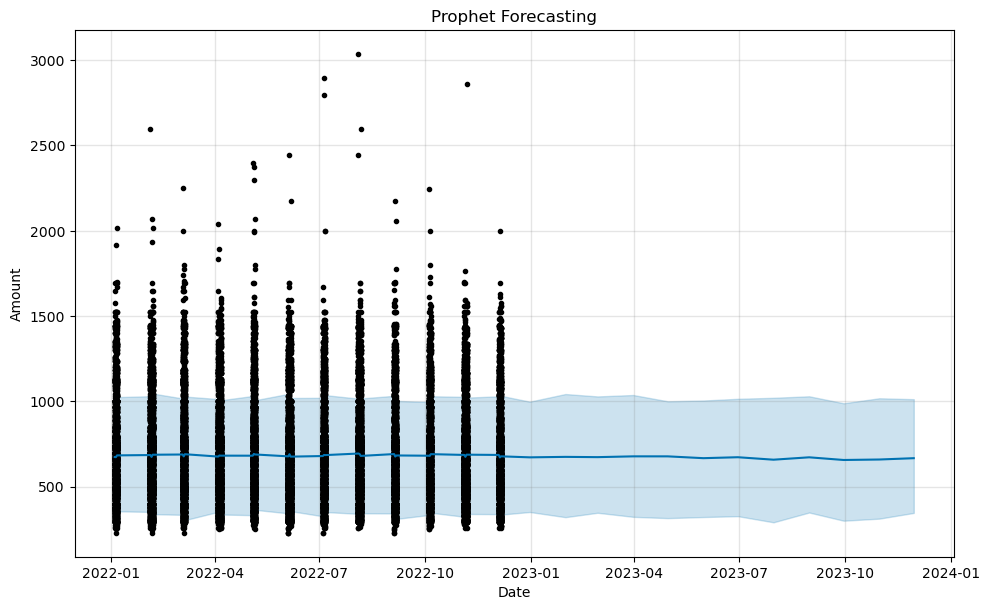

In [32]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assuming 'data' contains your time-series data with 'Date' as index and 'Amount' as target variable
data = pd.read_csv("Store Data.csv")
data.reset_index(inplace=True)  # Resetting index for Prophet

# Prepare the data
data = data.rename(columns={'Date': 'ds', 'Amount': 'y'})

# Instantiate and fit the model
model = Prophet()  # Note the correct capitalization of Prophet
model.fit(data)

# Make future predictions
future = model.make_future_dataframe(periods=12, freq='M')  # Forecasting 12 months into the future
forecast = model.predict(future)

# Visualize results
fig = model.plot(forecast)
plt.title('Prophet Forecasting')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.show()


In [2]:
#print(forecast.head())
#print(forecast.tail())
print(forecast.describe())

                        ds       trend  yhat_lower   yhat_upper  trend_lower  \
count                   48   48.000000   48.000000    48.000000    48.000000   
mean   2022-09-18 12:00:00  678.740436  339.436147  1026.157374   675.778672   
min    2022-01-04 00:00:00  658.577351  310.306961   978.433088   631.016629   
25%    2022-04-27 00:00:00  674.997193  329.506404  1019.451162   674.827019   
50%    2022-08-20 12:00:00  681.518329  337.132059  1024.390503   681.518329   
75%    2022-12-12 06:00:00  683.546376  347.200366  1037.949461   683.546376   
max    2023-11-30 00:00:00  686.989228  371.478581  1061.547146   686.989228   
std                    NaN    7.440541   14.342041    15.426239    13.845595   

       trend_upper  additive_terms  additive_terms_lower  \
count    48.000000       48.000000             48.000000   
mean    681.743746       -0.012054             -0.012054   
min     674.699388       -8.017454             -8.017454   
25%     679.105913       -6.293161     